In [1]:
# import important Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
# assign boston dataset into df2
df2 = load_boston()

In [3]:
# create df data frame for boston dataset
df = pd.DataFrame(df2.data, columns= df2.feature_names)
df['MDEV'] = df2.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# create x and y for spliting
x = df.drop('MDEV',axis = 1)
y = df['MDEV']

In [6]:
# import train test split for split data into train and test
from sklearn.model_selection import train_test_split

In [7]:
# split dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

In [8]:
# import ridge and gridsearch cv
from sklearn.linear_model import Ridge
re = Ridge()
from sklearn.model_selection import  GridSearchCV

In [10]:
# create different different alpha value and redge regression
params = {'alpha':[1e-10,1e-6,1e-8,1e-1,1,12,15,16,20]}
redge_reg = GridSearchCV(re,params,scoring='neg_mean_squared_error',cv = 5)

In [11]:
# train model
redge_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-10, 1e-06, 1e-08, 0.1, 1, 12, 15, 16,
                                   20]},
             scoring='neg_mean_squared_error')

In [12]:
# check best parameters and scores
print('Best Parameters:', redge_reg.best_params_)
print('Best Scores:', redge_reg.best_score_)

Best Parameters: {'alpha': 1e-06}
Best Scores: -25.187874624862786


In [14]:
# predicted on test data
y_pred = redge_reg.predict(x_test)

In [26]:
# import r2 score for check accuracy
from sklearn.metrics import r2_score

In [16]:
# check r2 score
r2_score(y_test,y_pred)

0.726157077785712

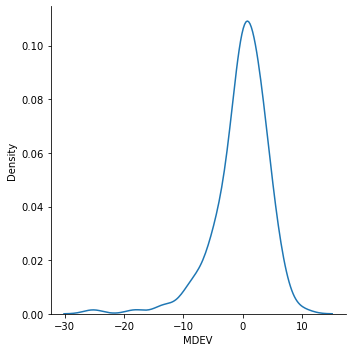

In [29]:
# check difference between actual data and predicted data
sns.displot(y_pred-y_test,kind='kde')
plt.show()

In [19]:
# import lasso for train data
from sklearn.linear_model import Lasso
la =Lasso()

In [20]:
# create lasso regression based on grid search cv
lasso_reg = GridSearchCV(la,params,scoring='neg_mean_squared_error',cv = 5)

In [21]:
# train model
lasso_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-06, 1e-08, 0.1, 1, 12, 15, 16,
                                   20]},
             scoring='neg_mean_squared_error')

In [27]:
# check best parameters and scores
print('Best Parameters:', lasso_reg.best_params_)
print('Best Scores:', lasso_reg.best_score_)

Best Parameters: {'alpha': 1e-10}
Best Scores: -25.187874739330447


In [22]:
# predict on test data
y_pred = lasso_reg.predict(x_test)

In [23]:
# check accuracy
r2_score(y_test,y_pred)

0.7261570836457929

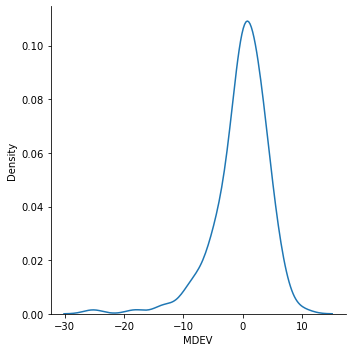

In [28]:
# check difference between predicted data and actual data
sns.displot(y_pred-y_test,kind='kde')